# Fantasy Premier League
## Analysis and Modelling

In this notebook I attempt to analyze FPL data from the 2019-20 season, looking at team performances and player performances. 

The data has been sourced from the following Github Repo:

https://github.com/vaastav/Fantasy-Premier-League

The data is largely from the official FPL website, while our other available data is from the football statistics website, understat.

I use this data with the objective of identifying what players might be a good pick for the upcoming 2020-21 season.

In [103]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import glob

import plotly.io as pio

pio.renderers.default = 'svg'

In [29]:
path = '../Fantasy-Premier-League-master/data/2019-20'
playerInfo = pd.read_csv(path + '/players_raw.csv')
playerInfo

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,2,2,242,0,0,4,69140,0,0,-4,...,58,43,25007,0,47630,0,0.3,8.4,Mustafi,2
1,0,4,204,100,100,4,98745,0,0,-3,...,81,44,206616,0,159819,0,0.3,8.5,Bellerín,2
2,2,1,331,100,100,4,111457,0,0,-3,...,98,55,65194,0,134275,0,0.5,10.6,Kolasinac,4
3,2,3,244,100,100,3,154043,0,0,-5,...,119,41,610816,0,653555,0,0.1,9.1,Maitland-Niles,4
4,0,5,305,100,100,4,39476,0,0,-2,...,76,57,182201,0,231413,0,0.0,11.9,Sokratis,6
5,0,1,54,0,0,1,38411,0,0,0,...,152,10,28283,0,89310,0,0.0,2.0,Monreal,0
6,0,0,0,0,0,0,51507,0,0,0,...,220,0,782,0,12898,0,0.0,0.0,Koscielny,0
7,0,0,0,0,0,0,233963,0,0,-2,...,211,0,1185,0,5056,0,0.0,0.0,Mavropanos,0
8,0,0,0,0,0,0,80254,0,0,0,...,214,0,534,0,2720,0,0.0,0.0,Jenkinson,0
9,0,2,96,100,100,1,156074,0,0,-1,...,145,16,28501,0,22667,0,0.2,3.6,Holding,1


In [23]:
playerStats = pd.read_csv(path + '/understat/understat_player.csv', encoding = "ISO-8859-1")
playerStats

,assists,games,goals,id,key_passes,npg,npxG,player_name,position,red_cards,shots,team_title,time,xA,xG,xGBuildup,xGChain,yellow_cards
0,5,35,23,755,32,19,15.097693,Jamie Vardy,F S,0,89,Leicester,3034,6.368298,18.903537,1.724341,21.026607,3
1,3,36,22,318,26,20,14.830359,Pierre-Emerick Aubameyang,F M S,1,93,Arsenal,3143,4.492487,16.352623,5.339657,19.964282,3
2,2,38,22,986,35,21,14.137379,Danny Ings,F M S,0,93,Southampton,2836,2.849085,15.659717,5.015938,18.488031,3
3,1,33,20,618,48,20,18.277569,Raheem Sterling,F M S,0,100,Manchester City,2678,7.208586,19.799906,10.185997,31.442010,5
4,10,34,19,1250,60,16,18.379812,Mohamed Salah,F S,0,132,Liverpool,2904,8.726043,20.663319,8.425027,31.374198,1
5,2,29,18,647,27,16,11.774765,Harry Kane,F,0,82,Tottenham,2595,3.117006,13.297066,3.051301,16.854616,4
6,7,35,18,838,59,18,14.577483,Sadio Mané,F M S,0,77,Liverpool,2761,7.235693,14.577483,6.767014,25.073205,3
7,6,32,17,553,30,17,12.479326,Anthony Martial,F S,0,80,Manchester United,2672,4.618777,13.240495,6.357817,20.409563,1
8,7,31,17,556,33,11,13.414414,Marcus Rashford,F M,0,95,Manchester United,2673,5.457173,19.503728,5.906573,20.244798,3
9,6,38,17,4105,48,13,13.466123,Raúl Jiménez,F S,0,117,Wolverhampton Wanderers,3269,7.226941,16.510798,5.709533,22.560240,3


In [47]:
# We need to split the dataset up by position, essentially, Forward, Mid, Defence, GK.
# Since the understat data does not use the players listed position, instead noting down all positions played
# in the season, we need to set up our filter

playerStats['Main Position'] = playerStats['position'].str[0]
positions = list(playerStats['Main Position'].value_counts().index)

fwdStats = playerStats[playerStats['Main Position'].isin(['F','S'])] 
midStats = playerStats[playerStats['Main Position'].isin(['M'])] 
defStats = playerStats[playerStats['Main Position'].isin(['D'])] 
gkStats = playerStats[playerStats['Main Position'].isin(['G'])] 



Look at xG vs Goals for strikers.

This let's us see which players have overperformed their stats, versus player's who have underperformed.


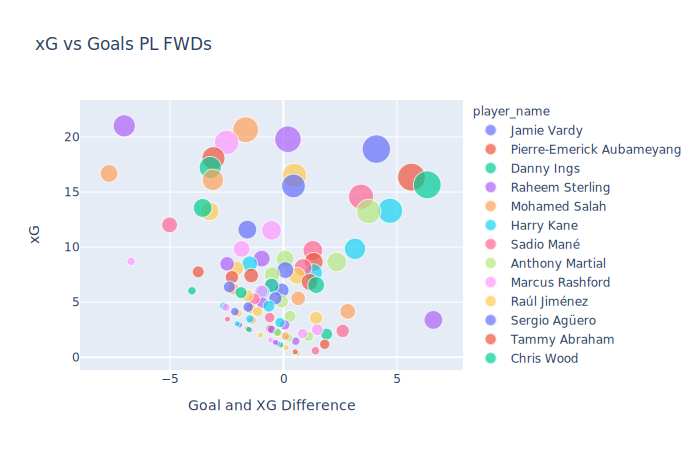

In [104]:
fwdStats['Goal and XG Difference'] = fwdStats['goals'] - fwdStats['xG']
fig = px.scatter(fwdStats[fwdStats['goals']>=1], x="Goal and XG Difference", y="xG", color="player_name", size = 'goals', hover_name="player_name",
                title = 'xG vs Goals PL FWDs')
fig.show()


The plot below shows us a range of forwards, and how they performed in comparison to their expected goals.

From this we can see, players like Gabriel Jesus and Roberto Firmino severely underperformed their xG, while Danny Ings and PEA overperformed their stats, showing their prolificness in front of goal.

This is helpful because it shows us that Jesus comes across a lot of chances, which is a good sign for prospective owners, and could potentially regress to the mean.

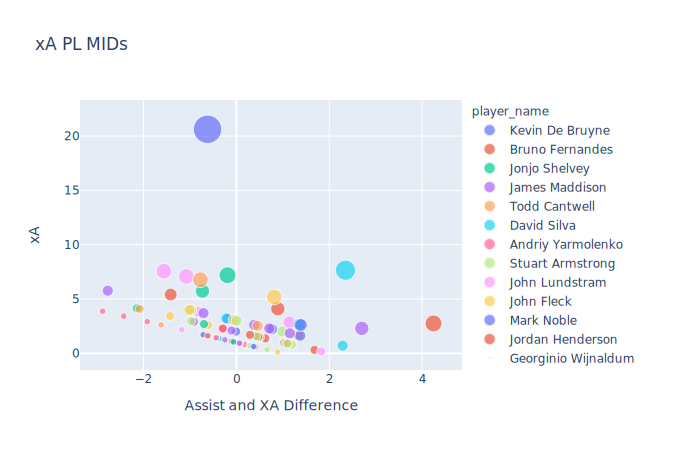

In [105]:
# Similarly, for midfielders, we can look at xA
midStats['Assist and XA Difference'] = midStats['assists'] - midStats['xA']
fig = px.scatter(midStats, x="Assist and XA Difference", y="xA", color="player_name", size = 'assists', hover_name="player_name",
                title = 'xA PL MIDs')
fig.show()

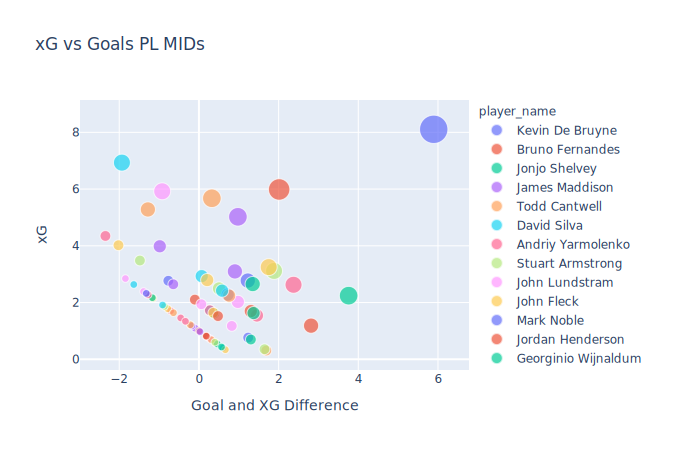

In [106]:
midStats['Goal and XG Difference'] = midStats['goals'] - midStats['xG']
fig = px.scatter(midStats[midStats['goals']>=1], x="Goal and XG Difference", y="xG", color="player_name", size = 'goals', hover_name="player_name",
                title = 'xG vs Goals PL MIDs')
fig.show()

We notice that Kevin De Bruyne did obscenely well last season, and is an almost essential pick. 

To get a better idea of who else to select, we look at the database without KDB.

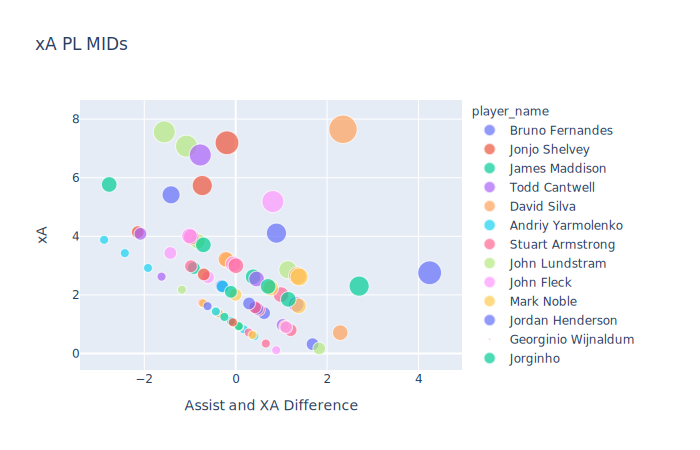

In [107]:
midStats2 = midStats[midStats['player_name'] != 'Kevin De Bruyne']

midStats2['Assist and XA Difference'] = midStats2['assists'] - midStats2['xA']
fig = px.scatter(midStats2, x="Assist and XA Difference", y="xA", color="player_name", size = 'assists', hover_name="player_name",
                title = 'xA PL MIDs')
fig.show()

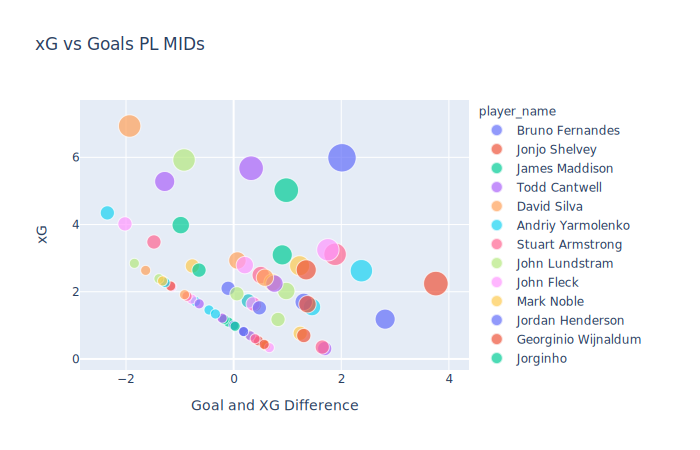

In [108]:
midStats2['Goal and XG Difference'] = midStats2['goals'] - midStats2['xG']
fig = px.scatter(midStats2[midStats2['goals']>=1], x="Goal and XG Difference", y="xG", color="player_name", size = 'goals', hover_name="player_name",
                title = 'xG vs Goals PL MIDs')
fig.show()